<a href="https://colab.research.google.com/github/dhkfkr134/algorithm/blob/main/BitwiseOperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19장 비트 조작

- 비트 조작은 하드웨어와의 관련이 깊다.
- 스위칭 회로의 연구에 논리 연산을 설명하는 부울대수를 적용하여 논리 회로가 만들어졌다.

## 부울 연산자(Boolean Operation)
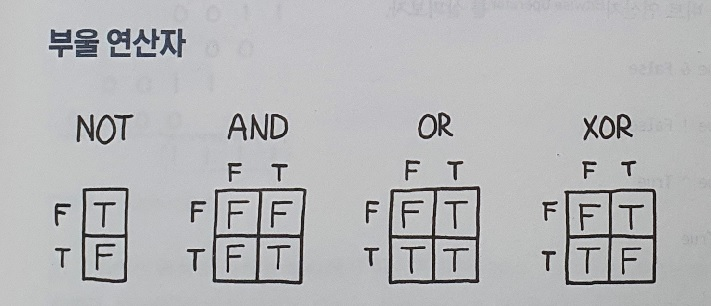

    >>>(x and not y) or (not x and y) //XOR연산
    

## 비트 연산자(Bitwise Operator)
    >>> True & False
    False
    >>> True | False
    True
    >>> True ^ True
    False
    >>> ~True
    -2
부울 연산자와 (and or xor)마찬가지로 동작하며, True의 경우 1로 간주되어 ^true는 1의 보수인 -2가 된다.

cf. 부울 연산에서는 not은 역전, 비트 연산에서 not은 보수 

## 비트 조작 퀴즈
- 덧셈
- 곱셈
        >>>bin(0b0011 * 0b0101)
        '0b1111'
- 시프팅(shifting)

    : 곱셈연산으로 구현가능
- 보수
        >>>bin(0b0101 ^ ~0b1100)
        '-0b1010
    ~0b1100은 3이 아니라 -13이다.

### 자릿수 제한 비트 연산
- Mask만들기
        >>> MASK = 0b1111
- XOR연산
        >>> bin(0b1100 ^ MASK)
        '0b0011'



### 파이썬 진법 표현
- 이진수 <-> 십진수
        >>> bin(87)
        '0b1010111'
        >>> int('0b1010111', 2)
        87
        >>> int('1010111', 2)
        87
    int()의 경우 접두사 0b 생략가능
- 타입
        >>> a = bin(87)
        >>> a
        '0b1010111'
        >>> b = 0b1010111
        >>> b
        87
    bin()으로 할당하면 문자형이됨

    문자형이 아닌 이진수로 할당하면 십진수로 변환되어 동일하게 처리됨.
- 16진수
        >>> hex(87)
        '0x57'
    bin()과 같은 특성을 갖는다.


## 2의 보수



### 2의 보수 숫자 포멧
- 4비트의 경우 0111~1000까지(7 ~ -8) 가능
- 파이썬은 임의 정밀도를 지원하므로 부호는 별도 필드로 갖고, 비트연산이 필요할때만 2의 보수로 변환한다.

    => 즉 실제 2의 보수값을 보여주지 않는다.
        >>> bin(-5)
        '-0b101'
    

### 2의 보수 수학 연산
    
####보수
- 숫자 포멧의 의미
- 수학 연산의 의미
-------------------------------


1.   '비트 연산자 NOT' = 2의보수 - 1
2.   '2의 보수 수학 연산' = 비트연산자 NOT + 1





### 비트 연산자 NOT

마찬가지


## 문제 70. 싱글 넘버
> 하나만을 제외한 모든 요소는 2개씩 있다. 1개인 요소를 찾아라.

* 입력 : [2,2,1]
* 출력 : 1


* 입력 : [4,1,2,1,2]
* 출력 : 4

In [ ]:
# 문제 70. XOR 연산
from typing import List


class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        result = 0
        for num in nums:
            result ^= num

        return result

nums안에 두번있는 숫자는 xor을 2번연산하여 비트가 사라진다.


## 문제 71. 해밍 거리
> 두 정수를 입력바아서 다른 비트 수를 계산하라.

* 입력 : x = 1, y =4
* 출력 : 2
* (x = ...0001, y =...0100)


In [ ]:
# 문제 71 XOR 연산

class Solution:
    def hammingDistance(self, x: int, y: int) -> int:
        return bin(x ^ y).count('1')

자연어 처리(문자열)에서도 해밍 거리개념 사용.


## 문제 72. 두 정수의 합
> 두 정수의 합을 구하라, -,+연산자 사용 불가.

* 입력 : a = 1, b = 2
* 출력 : 3


* 입력 : a = -2, b = 3
* 출력 : 1

In [ ]:
# 문제. 72-1 전가산기 방식(XOR)
class Solution:
    def getSum(self, a: int, b: int) -> int:
        MASK = 0xFFFFFFFF
        INT_MAX = 0x7FFFFFFF

        a_bin = bin(a & MASK)[2:].zfill(32)
        b_bin = bin(b & MASK)[2:].zfill(32)

        result = []
        carry = 0
        sum = 0
        for i in range(32):
            A = int(a_bin[31 - i])
            B = int(b_bin[31 - i])

            # 전가산기 구현
            Q1 = A & B
            Q2 = A ^ B
            Q3 = Q2 & carry
            sum = carry ^ Q2
            carry = Q1 | Q3

            result.append(str(sum))
        if carry == 1:
            result.append('1')

        # 초과 자릿수 처리
        result = int(''.join(result[::-1]), 2) & MASK
        # 음수 처리
        if result > INT_MAX:
            result = ~(result ^ MASK)

        return result

In [ ]:
# 문제 72-2 전가산기, carry와 합의 값만 담기게
class Solution:
    def getSum(self, a: int, b: int) -> int:
        MASK = 0xFFFFFFFF
        INT_MAX = 0x7FFFFFFF
        # 합, 자릿수 처리
        while b != 0:
            a, b = (a ^ b) & MASK, ((a & b) << 1) & MASK

        # 음수 처리
        if a > INT_MAX:
            a = ~(a ^ MASK)
        return a


## 문제 73. UTF-8 검증
> 입력값이 UTF-8 문자열이 맞는지 검증하라.

* 입력 : data = [197, 130, 1]
* 출력 : True


* 입력 : data = [235, 140, 4]
* 출력 : False

UTF-8 바이트 포멧

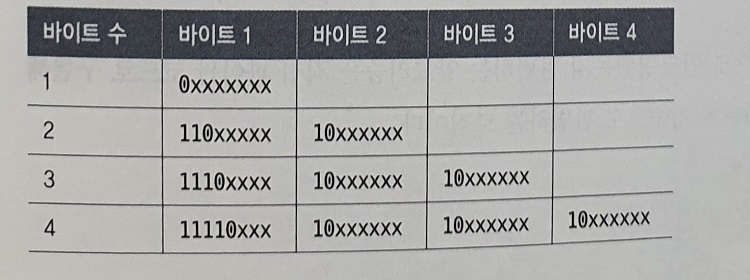

In [ ]:
# 문제 73. UTF-8 검증
from typing import List


class Solution:
    def validUtf8(self, data: List[int]) -> bool:
        # 문자 바이트 만큼 10으로 시작 판별
        def check(size):
            for i in range(start + 1, start + size + 1):
                if i >= len(data) or (data[i] >> 6) != 0b10:
                    return False
            return True

        start = 0
        while start < len(data):
            # 첫 바이트 기준 총 문자 바이트 판별
            first = data[start]
            if (first >> 3) == 0b11110 and check(3):
                start += 4
            elif (first >> 4) == 0b1110 and check(2):
                start += 3
            elif (first >> 5) == 0b110 and check(1):
                start += 2
            elif (first >> 7) == 0:
                start += 1
            else:
                return False
        return True


## 문제 74. 1비트의 개수
> unsigned int형으로 입력받아서 1비트의 개수를 출력하라.

* 입력 : 0000000000000001011
* 출력 : 3


* 입력 : 0000000000010000000
* 출력 : 1

* 입력 : 1111111111111111101
* 출력 : 18

In [ ]:
# 문제 74-1 해밍 거리

class Solution:
    def hammingWeight(self, n: int) -> int:
        return bin(n).count('1')
        

In [ ]:
# 문제 74-2 비트 연산(and)
class Solution:
    def hammingWeight(self, n: int) -> int:
        count = 0
        while n:
            n &= n - 1
            count += 1
        return count

### XOR을 이용한 변수 스왑
- 8장에서 소개한 방법과 같이 임시 변수 없이 스왑가능.

        >>> x, y = 9, 4
        >>> x = x^y
        >>> y = x^y
        >>> x = x^y
        >>> x, y
        (4, 9)